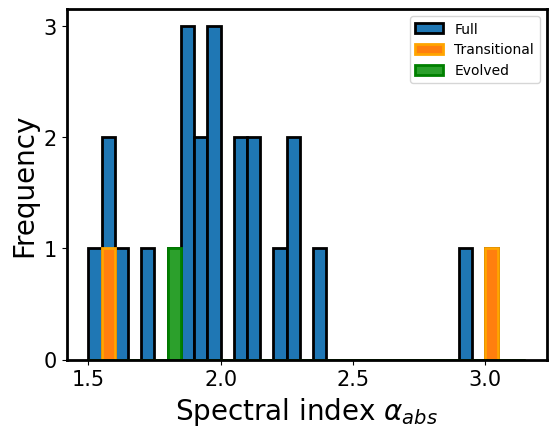

Sources            SpT    log(T_{star}/K)    Distance             log frac{l_{\star}}{L_{\odot}}    Stellar mass (M_{\star})
-----------------  -----  -----------------  -------------------  --------------------------------  --------------------------
J15354856-2958551  M4     3.51\pm0.02        87.84(-1.05,+1.07)   -1.035(0.046,-0.046)              0.27(0.13,-0.1)
J15514032-2146103  M4     3.51\pm0.02        140.84(-0.79,+0.8)   -1.335(0.096,-0.096)              0.27(0.13,-0.1)
J15521088-2125372  M4     3.51\pm0.02        154.94(-5.02,+5.36)  -1.752(0.117,-0.117)              0.27(0.13,-0.1)
J15530132-2114135  M4     3.51\pm0.02        143.04(-1.05,+1.06)  -1.212(0.099,-0.099)              0.27(0.13,-0.1)
J15534211-2049282  M3.5   3.52\pm0.02        145.0(-20.0,+20.0)   -0.84(0.14,-0.14)                 0.33(0.16,-0.12)
J15551704-2322165  M2.5   3.54\pm0.02        145.0(-20.0,+20.0)   -0.54(0.15,-0.15)                 0.49(0.18,-0.16)
J15554883-2512240  G3     3.77\pm0.01        143.5

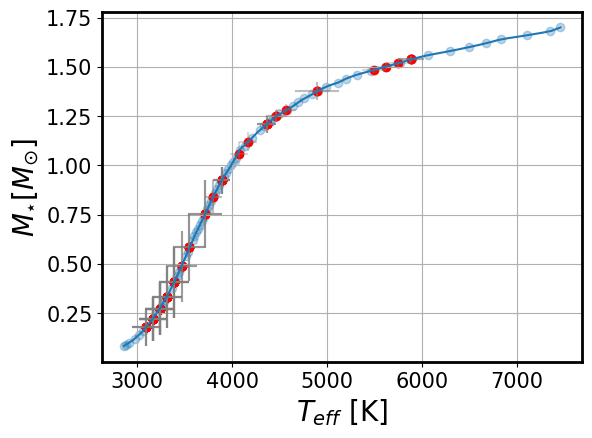

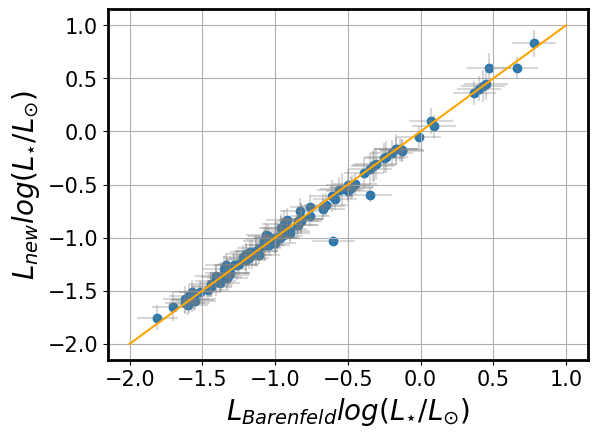

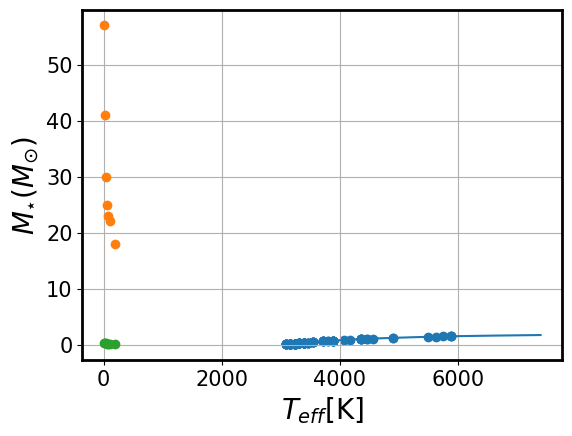

[-2, -3, 0, -9, -9, -7, -3, -46, 0, -2, -16, -2, -1, -5, -4, -2, 0, -7, -3, -8, -2, -2, -1, -3]
434.11935696470897
21
11.75


/Users/mauro/Library/CloudStorage/Dropbox/GitHub/Upper-Sco-2022/Table_3.py:103: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_3_pandas.to_latex('Table 3 pandas.tex', index=False, longtable=True, escape=False, column_format='lcccccc')


In [1]:
from data_file import source_list_garrett, radius_dust_updated, luminosity_list_barenfeld_updated, flux_barenfeld_0_88mm_updated
from scipy.integrate import quad
from Table_2 import surface_density_list
from Table_3 import opacity_list_0_87mm
from astropy import constants
import numpy as np

index_J16153456_2242421 = source_list_garrett.index("J16153456-2242421")


c = constants.c.cgs.value
h = constants.h.cgs.value
k_b = constants.k_B.cgs.value
s_b = constants.sigma_sb.cgs.value

# following values can be changed
i_list = [0, 30, 60]
# for i in radians from 'x' degrees i = x * np.pi/180
# for i in degrees from 'x' radians i = x * 180/np.pi
flaring = 0.02
L = 1.033 * 10 ** 34 * (10**luminosity_list_barenfeld_updated[index_J16153456_2242421])
k_v = opacity_list_0_87mm[index_J16153456_2242421]
d = 4.32 * 10 ** 20
sur_den_0 = 10**surface_density_list[index_J16153456_2242421]


#1 AU in cm is 1.5.* 10 ** 13
AU = 10
AU_in_cm = 1.5 * 10 ** 13
R_in = AU_in_cm
R = AU_in_cm

# fixed R for the sur_den function
R_out = radius_dust_updated[index_J16153456_2242421] * AU_in_cm

upper_limit = radius_dust_updated[index_J16153456_2242421]
steps = 1000

f = c / 0.1
i = 46 * np.pi/180
# define temperature function
def T(flaring, L, s_b, R):
    return (flaring * L / (8 * np.pi * R ** 2 * s_b)) ** (1/4)

# define surface density function
def sur_den(R):
    return sur_den_0 * ((R / (10 * AU_in_cm)) ** (-1))

# define tau function
def tau(sur_den, k_v, i):
    return sur_den(R) * k_v / np.cos(i)

# define planck's function
def planck_function(h, f, c, k_b, T):
    return 2 * h * (f ** 3) / ((c ** 2) * (np.e**(h * f / (k_b * T(flaring, L, s_b, R))) - 1))

# define part of the function 2.1 to be integrated
def fun(R, h, f, c, k_b, T, tau):
    return planck_function(h,f,c,k_b,T) * (1 - np.e ** (-tau)) *R

# define integration
def int(fun, h, f, c, k_b, T, tau):
    return quad(fun,
                R_in, R_out, args=(h, f, c, k_b, T, tau(sur_den, k_v, i)))

def final(fun, h, f, c, k_b, T, tau):
    return 2 * np.pi * np.cos(i) / d ** 2 * int(fun, h, f, c, k_b, T, tau)[0]



print(10 ** 26 * final(fun, h, f, c, k_b, T, tau))
print(radius_dust_updated[index_J16153456_2242421])
print(flux_barenfeld_0_88mm_updated[index_J16153456_2242421])

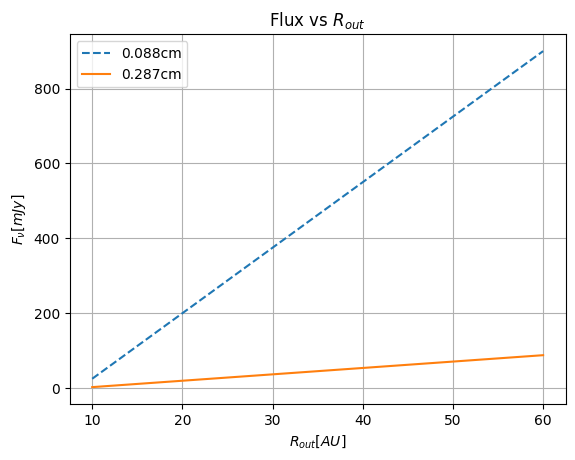

(None, <matplotlib.legend.Legend at 0x1381a6e90>, None)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from astropy import constants

# all constants in cgs
wavelength_list = [0.088, 0.287]
c = constants.c.cgs.value
h = constants.h.cgs.value
k_b = constants.k_B.cgs.value
s_b = constants.sigma_sb.cgs.value

# following values can be changed
i_list = [21]
# for i in radians from 'x' degrees i = x * np.pi/180
# for i in degrees from 'x' radians i = x * 180/np.pi
flaring = 0.02
L = 1.033 * 10 ** 34
k_v = 2.5
d = 4.32 * 10 ** 20
sur_den_0 = 0.0052480746


#1 AU in cm is 1.5.* 10 ** 13
AU = 10
AU_in_cm = 1.5 * 10 ** 13
R_in = AU_in_cm
R = AU_in_cm

# fixed R for the sur_den function
R_out = 100 * AU_in_cm

upper_limit = float(input("Upper Limit? "))
steps = float(input("Steps? "))

y_axis_values = []
x_axis_values = []

for wavelengths in wavelength_list:
    wavelength = wavelengths
    f = c / wavelength

    for inclinations in i_list:
        i = inclinations * np.pi / 180
        AU = 10
        while AU <= upper_limit:
            R_out = AU * AU_in_cm

        # define temperature function
            def T(flaring, L, s_b, R):
                return (flaring * L / (8 * np.pi * R ** 2 * s_b)) ** (1/4)

        # define surface density function
            def sur_den(R):
                return sur_den_0 * ((R / (10 * AU_in_cm)) ** (-1))

        # define tau function
            def tau(sur_den, k_v, i):
                return sur_den(R) * k_v / np.cos(i)

        # define planck's function
            def planck_function(h, f, c, k_b, T):
                return 2 * h * (f ** 3) / ((c ** 2) * (np.e**(h * f / (k_b * T(flaring, L, s_b, R))) - 1))

        # define part of the function 2.1 to be integrated
            def fun(R, h, f, c, k_b, T, tau):
                return planck_function(h,f,c,k_b,T) * (1 - np.e ** (-tau)) *R

        # define integration
            def int(fun, h, f, c, k_b, T, tau):
                return quad(fun,
                            R_in, R_out, args=(h, f, c, k_b, T, tau(sur_den, k_v, i)))

            def final(fun, h, f, c, k_b, T, tau):
                return 2 * np.pi * np.cos(i) / d ** 2 * int(fun, h, f, c, k_b, T, tau)[0]



            y_axis_values.append(10 ** 26 * final(fun, h, f, c, k_b, T, tau))
            x_axis_values.append(AU)
            AU += steps
        if wavelengths == 0.088:
            linestyle = 'dashed'
        else:
            linestyle = '-'

        plt.plot(x_axis_values, y_axis_values, label=('$\lambda = $' + str(wavelength) + " cm " + str(inclinations)
                                                      + ' degrees'), linestyle=linestyle)
        y_axis_values = []
        x_axis_values = []

label_1 = (r'$\frac{2{\pi}cosi}{d^2}$')
label_2 = ('$\int_{R_{in}}^{R_{out}}$')
label_3 = (r'$B_\nu[T_i(R)][1-e^{-\tau_{\nu}^{i}(R)}]RdR$')

plt.ylabel(r'$F_\nu[mJy]$'), plt.xlabel('$R_{out}[AU]$')

plt.title("Flux vs $R_{out}$")
plt.grid(), plt.legend(), plt.show()
